DATA CLEANING

In [1]:
import pandas as pd

data = pd.read_csv("diabetes_prediction_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [4]:
data.duplicated().sum()   # check
data = data.drop_duplicates()   # remove

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["gender"] = le.fit_transform(data["gender"])
data["smoking_history"] = le.fit_transform(data["smoking_history"])


In [8]:
data.describe()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,2.231159,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,1.879963,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,4.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [13]:
data.isnull().sum()     # should be 0

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [14]:
data.duplicated().sum() # should be 0

np.int64(0)

In [15]:
data.shape              # final dataset size

(76641, 9)

In [16]:
data.to_csv("cleaned_diabetes_dataset.csv", index=False)

**XGBoost**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [18]:
df = pd.read_csv("cleaned_diabetes_dataset.csv")
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,54.0,0,0,0,27.32,6.6,80,0
1,1,28.0,0,0,4,27.32,5.7,158,0
2,0,36.0,0,0,1,23.45,5.0,155,0
3,0,20.0,0,0,4,27.32,6.6,85,0
4,0,79.0,0,0,0,23.86,5.7,85,0


In [26]:
#Separating features and target
X = df.drop("diabetes", axis=1)       #target column: diabetes
y = df["diabetes"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:35:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoostError: [16:35:52] /workspace/src/objective/regression_obj.cu:119: Check failed: is_valid: base_score must be in (0,1) for the logistic loss.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2be09c) [0x7cddbb0be09c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x1077f04) [0x7cddbbe77f04]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x1078525) [0x7cddbbe78525]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x6d20c9) [0x7cddbb4d20c9]
  [bt] (4) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x6f53c7) [0x7cddbb4f53c7]
  [bt] (5) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x77) [0x7cddbafcab77]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7cde02a68e2e]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7cde02a65493]
  [bt] (8) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x98c1) [0x7cde03de88c1]



In [24]:
print(y.unique())
print(y.value_counts())
print(y.dtype)


[0]
diabetes
0    76641
Name: count, dtype: int64
int64


In [25]:
data["diabetes"].value_counts()

,count
diabetes,
0,76641


In [29]:
data_original = pd.read_csv("diabetes_prediction_dataset.csv")
data_original["diabetes"].value_counts()

,count
diabetes,
0,91500
1,8500


In [30]:
data = pd.read_csv("diabetes_prediction_dataset.csv")


In [31]:
data = data.drop_duplicates()


In [32]:
data["diabetes"].value_counts()


,count
diabetes,
0,87664
1,8482


In [33]:
import pandas as pd

data = pd.read_csv("diabetes_prediction_dataset.csv")
data.shape


(100000, 9)

In [34]:
data["diabetes"].value_counts()

,count
diabetes,
0,91500
1,8500


In [35]:
data = data.drop_duplicates()


In [36]:
data.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["gender"] = le.fit_transform(data["gender"])
data["smoking_history"] = le.fit_transform(data["smoking_history"])


In [38]:
print("Missing values:\n", data.isnull().sum())
print("\nDuplicates:", data.duplicated().sum())
print("\nClass balance:\n", data["diabetes"].value_counts())


Missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Duplicates: 0

Class balance:
 diabetes
0    87664
1     8482
Name: count, dtype: int64


In [39]:
data.to_csv("cleaned_safe_diabetes.csv", index=False)


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [41]:
df = pd.read_csv("cleaned_safe_diabetes.csv")
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [43]:
#Separating features and target
X = df.drop("diabetes", axis=1)
y = df["diabetes"].astype(int)   #target column: diabetes

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [45]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [51]:
y_train_pred = model.predict(X_train)

In [52]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9710723386551563


In [53]:
from sklearn.metrics import classification_report

print("Training Classification Report:\n")
print(classification_report(y_train, y_train_pred))

Training Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     70130
           1       0.99      0.68      0.81      6786

    accuracy                           0.97     76916
   macro avg       0.98      0.84      0.90     76916
weighted avg       0.97      0.97      0.97     76916



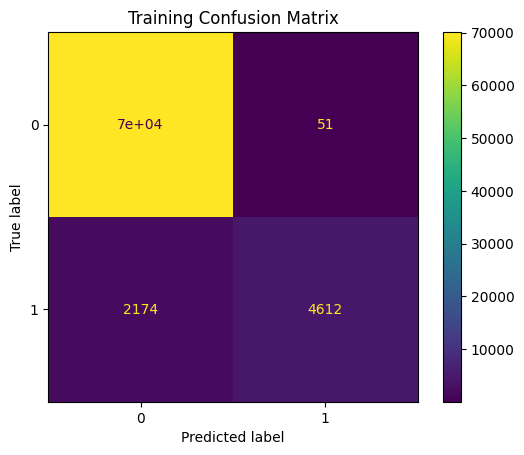

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()

plt.title("Training Confusion Matrix")
plt.show()

In [55]:
y_pred = model.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9722308892355694


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       0.99      0.69      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



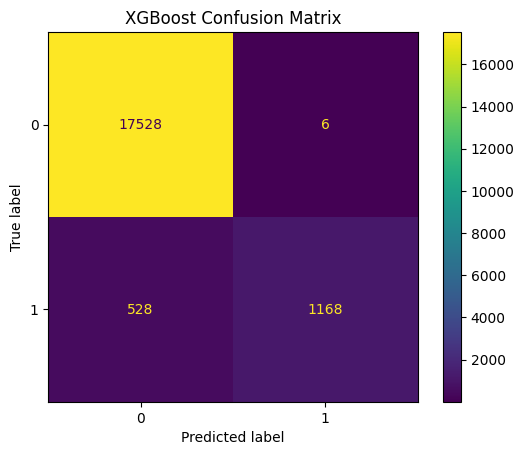

In [58]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title("XGBoost Confusion Matrix")
plt.show()

In [59]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", roc)

ROC-AUC Score: 0.9775078499777252


In [60]:
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)

Training Accuracy: 0.9710723386551563
Test Accuracy: 0.9722308892355694
